Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


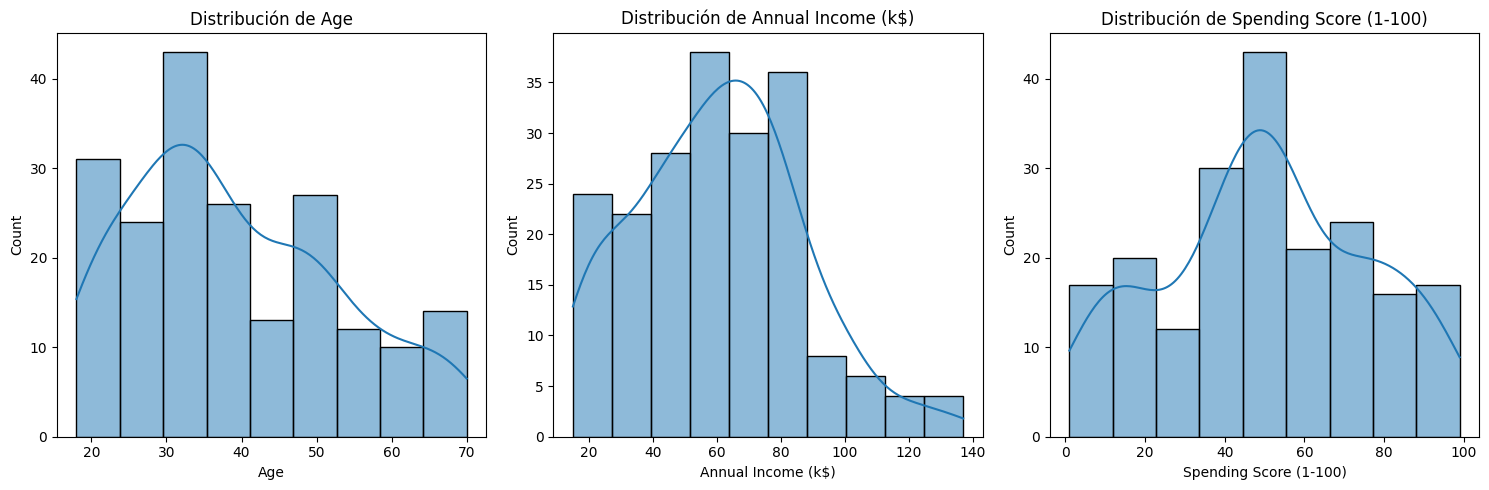

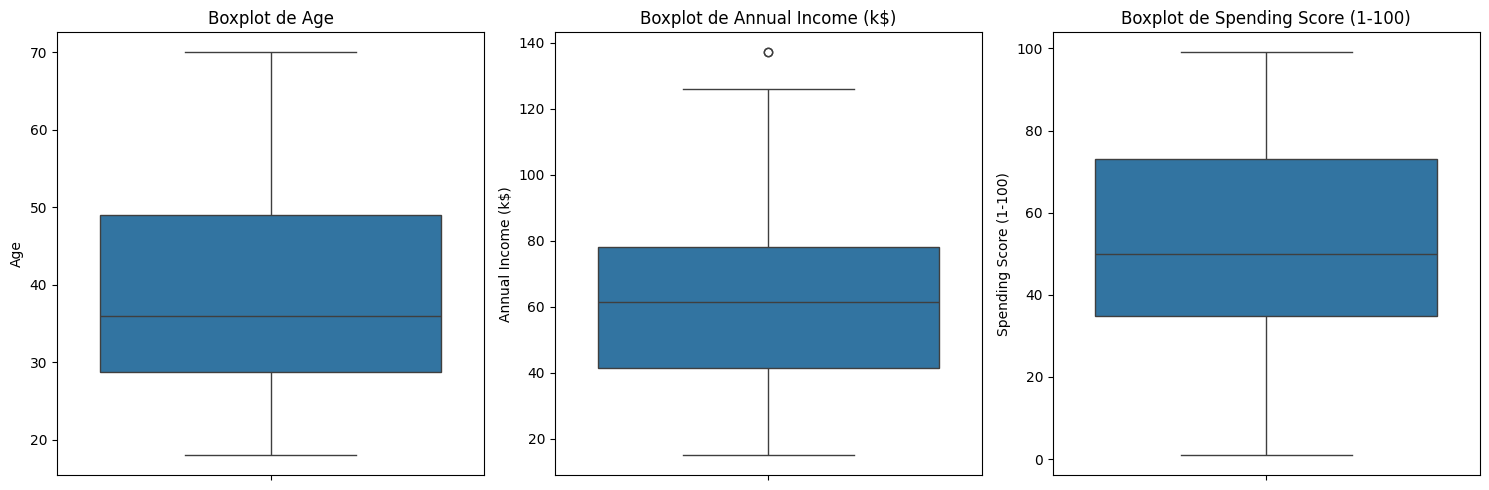


Conteo de género:
Gender
Female    112
Male       88
Name: count, dtype: int64


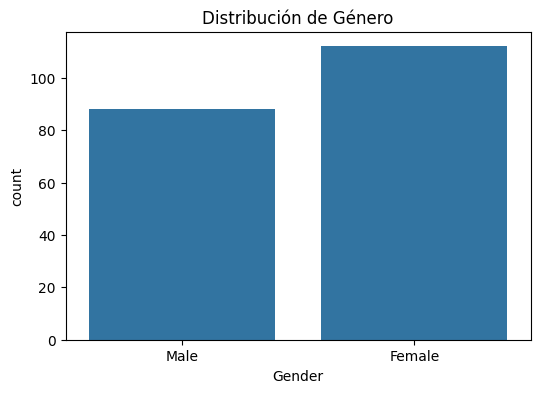

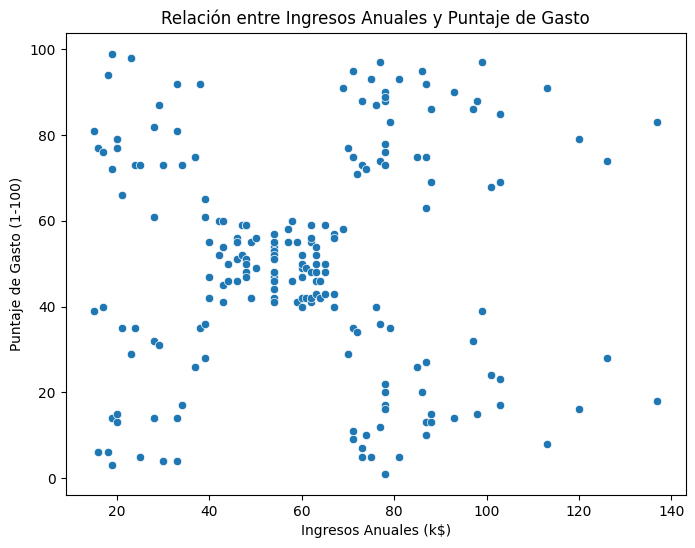

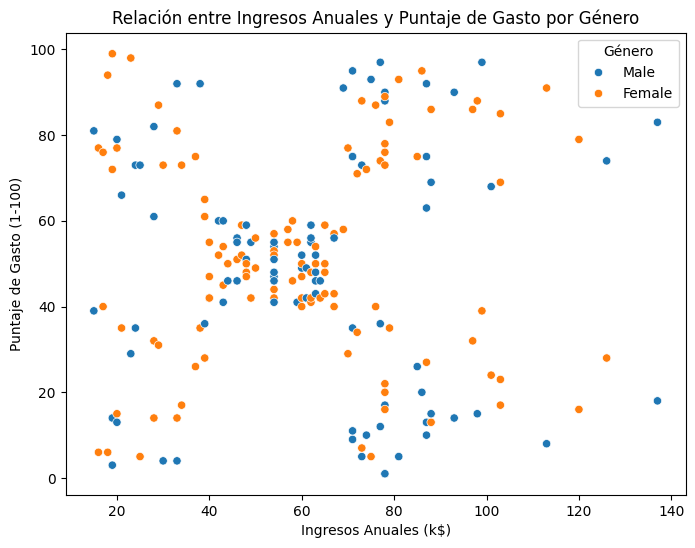

Primeras filas de los datos escalados:
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

Estadísticas descriptivas de los datos escalados:
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            1.002509e+00
min         -1.738999e+00           -1.910021e+00
25%         -7.275093e-01           -5.997931e-01
50%          3.587926e-02           -7.764312e-03
75%          6.656748e-01            8.851316e-01
max          2.917671e+00            1.894492e+00


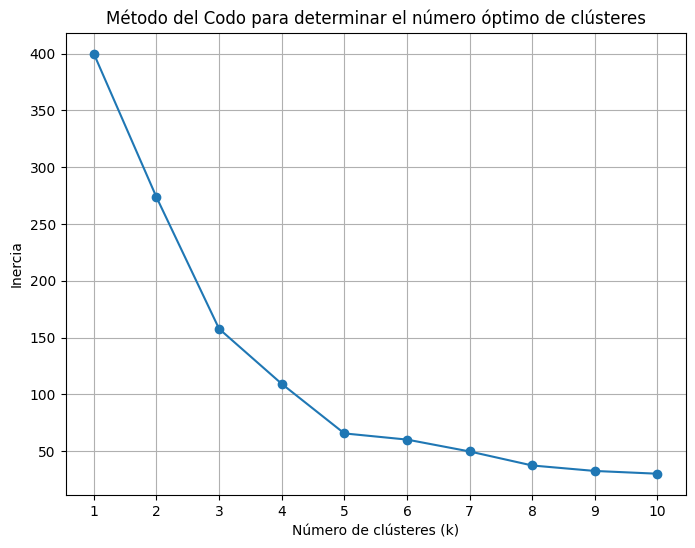

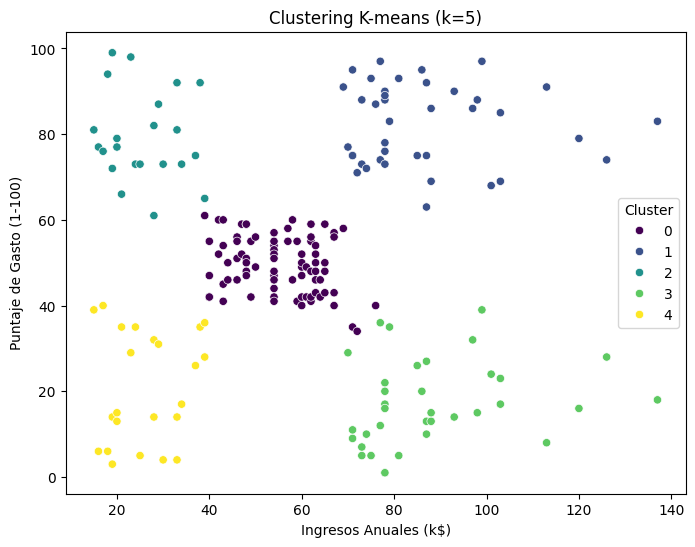

Coeficiente de Silhouette para k=5: 0.555


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("../data/Mall_Customers.csv")

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Visualizar la distribución de las variables numéricas
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Visualizar la distribución de las variables numéricas con boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Analizar la variable 'Gender'
print("\nConteo de género:")
print(df['Gender'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.show()

# Visualizar la relación entre 'Annual Income (k$)' y 'Spending Score (1-100)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Relación entre Ingresos Anuales y Puntaje de Gasto')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

# Visualizar la relación entre 'Annual Income (k$)' y 'Spending Score (1-100)' segmentado por 'Gender'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Relación entre Ingresos Anuales y Puntaje de Gasto por Género')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Género')
plt.show()

from sklearn.preprocessing import StandardScaler

# Seleccionar las características para el clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el array escalado de nuevo a un DataFrame (opcional, para inspección)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print("Primeras filas de los datos escalados:")
print(X_scaled_df.head())

print("\nEstadísticas descriptivas de los datos escalados:")
print(X_scaled_df.describe())

from sklearn.cluster import KMeans

# Calcular la inercia para diferentes valores de k
inertia = []
k_range = range(1, 11)  # Probaremos con k desde 1 hasta 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  # n_init='auto' para evitar el warning
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Entrenar el modelo K-means con k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres asignados a cada punto
labels = kmeans.labels_

# Añadir las etiquetas de los clústeres al DataFrame original
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Visualizar los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clustered, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clustering K-means (k=5)')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

from sklearn.metrics import silhouette_score

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Coeficiente de Silhouette para k=5: {silhouette_avg:.3f}")